# Task 31-> Dimensionality Reduction Techniques

Dimensionality reduction techniques are crucial in machine learning and data analysis, as they help manage the complexity of high-dimensional data, reduce computational overhead, and mitigate the risk of overfitting. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import umap
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

2024-08-13 19:53:49.106628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 19:53:49.106752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 19:53:49.255056: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the dataset


In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-gene-expression-cumida/Breast_GSE45827.csv')
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


## Check for missing values


In [3]:
print("Missing values:")
print(data.isnull().sum())
print("\n\nMissing Values in the Dataset = ",data.isnull().sum().sum())

Missing values:
samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64


Missing Values in the Dataset =  0


## Remove rows with missing values if any


In [4]:
data = data.dropna()

# Separate features and target


In [5]:
X = data.drop(['samples', 'type'], axis=1)
y = data['type']

## Encode the target variable


Autoencoders are a type of neural network used for unsupervised learning. They learn to encode data into a lower-dimensional representation and then decode it back to the original dimension.

#### Procedure:

Train the network to minimize the reconstruction error between the input and the output.
The encoder part of the network maps the input to a lower-dimensional representation.

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

## Split the data into training and testing sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features

In [8]:
scaler = StandardScaler()

In [9]:
# transforming train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("Original data shape:", X_train.shape)

Original data shape: (120, 54675)


## Function to evaluate model performance


In [11]:
# Used RandomForest as a Classifier
def evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

## Function to plot results

In [12]:
def plot_results(X_reduced, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Linear Dimensionality Reduction Techniques
Linear dimensionality reduction methods assume that the data lie on or near a linear subspace. These techniques are typically easier to implement and interpret but may not capture complex structures in the data.
## 1. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a widely used linear technique that transforms data into a new coordinate system where the axes (principal components) correspond to directions of maximum variance in the data. The first principal component captures the most variance, the second captures the next most variance orthogonal to the first, and so on.

### Procedure:

* Standardize the dataset.
* Compute the covariance matrix.
* Obtain eigenvalues and eigenvectors of the covariance matrix.
* Sort eigenvectors by eigenvalues in descending order and choose the top k eigenvectors to form the new feature space.
### Applications: 
Data visualization, noise reduction, feature extraction.

In [13]:
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_train_scaled)
print("PCA reduced shape:", X_pca.shape)

PCA reduced shape: (120, 100)


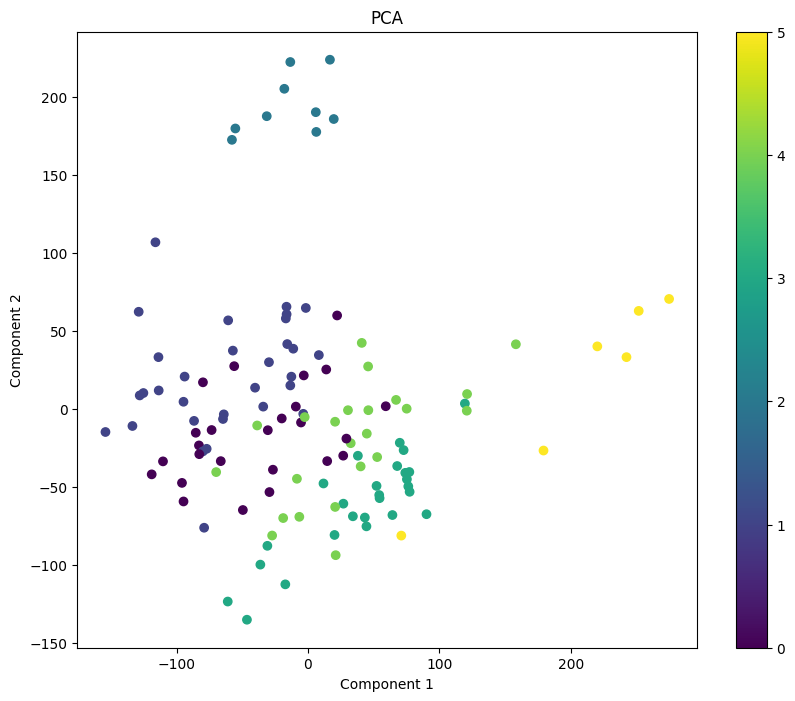

In [14]:
plot_results(X_pca[:, :2], y_train, "PCA")

In [15]:
X_pca_test = pca.transform(X_test_scaled)
pca_accuracy = evaluate_model(X_pca, X_pca_test, y_train, y_test)
print("PCA Accuracy:", pca_accuracy)

PCA Accuracy: 0.7741935483870968


## 2. Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used primarily for classification problems. It aims to find the linear combinations of features that best separate different classes in the dataset.

### Procedure:

* Compute the within-class scatter matrix and the between-class scatter matrix.
* Compute the eigenvalues and eigenvectors of the matrix resulting from the ratio of these scatter matrices.
* Select the eigenvectors corresponding to the largest eigenvalues to form the new feature space.
### Applications: 
Pattern recognition, classification tasks, data preprocessing.

In [16]:
n_components = min(len(np.unique(y)) - 1, X_train.shape[1])
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X_train_scaled, y_train)
print("LDA reduced shape:", X_lda.shape)

LDA reduced shape: (120, 5)


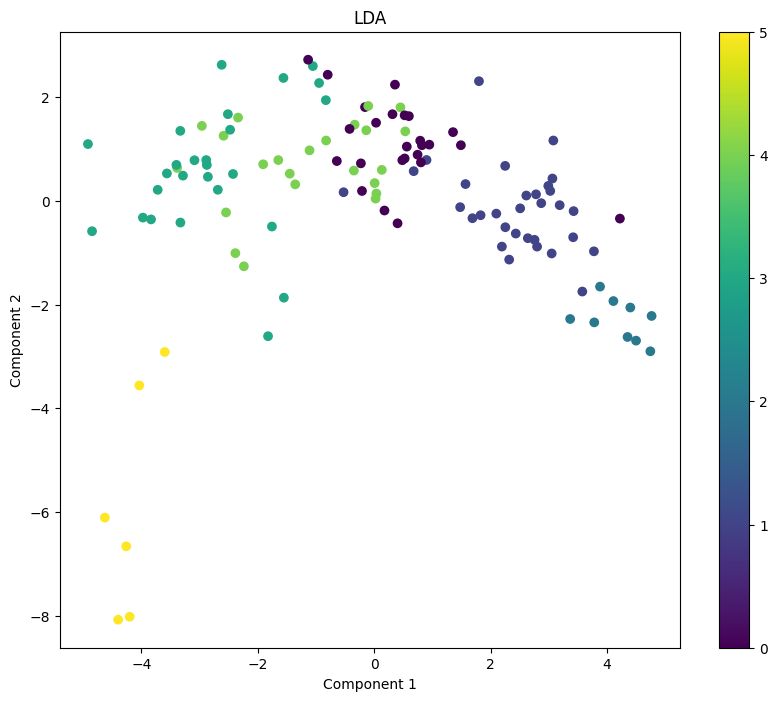

In [17]:
plot_results(X_lda[:, :2], y_train, "LDA")

In [18]:
X_lda_test = lda.transform(X_test_scaled)
lda_accuracy = evaluate_model(X_lda, X_lda_test, y_train, y_test)
print("LDA Accuracy:", lda_accuracy)

LDA Accuracy: 0.9354838709677419


# Non-Linear Dimensionality Reduction Techniques
Non-linear dimensionality reduction methods can capture complex relationships between data points that linear techniques might miss. They are generally more computationally intensive.
## 1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique particularly well-suited for visualizing high-dimensional data in 2D or 3D. It focuses on preserving the local structure of the data and the distances between neighboring data points.

### Procedure:

* Compute pairwise similarities between data points using a probability distribution.
* Use a different probability distribution in the lower-dimensional space to model these similarities.
* Minimize the Kullback-Leibler divergence between the two distributions using gradient descent.
### Applications: 
Data visualization, exploratory data analysis.

In [19]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
print("t-SNE reduced shape:", X_tsne.shape)

t-SNE reduced shape: (120, 2)


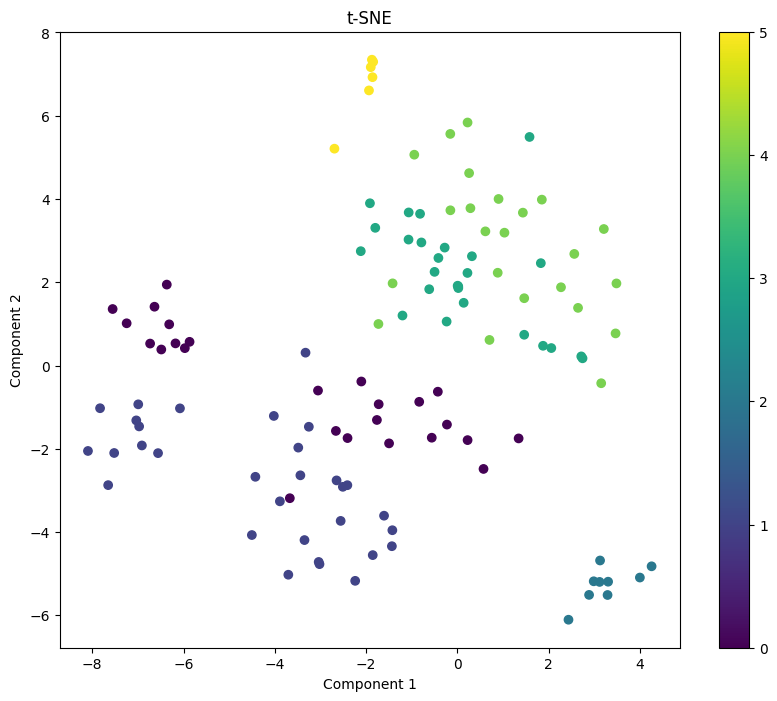

In [20]:
plot_results(X_tsne, y_train, "t-SNE")
# t-SNE is not meant for dimensionality reduction in the sense of feature extraction,
# so we won't evaluate its performance on the test set.

## 2. Independent Component Analysis (ICA)
Independent Component Analysis (ICA) is a technique used to separate a multivariate signal into additive, statistically independent components. It's commonly used in fields like signal processing and image processing.

### Procedure:

* Center and whiten the data (remove the mean and normalize).
* Use an optimization algorithm to maximize statistical independence among the components, often based on measures like non-Gaussianity.
### Applications: 
Blind source separation, noise reduction.

In [21]:
ica = FastICA(n_components=50, random_state=42)
X_ica = ica.fit_transform(X_train_scaled)
print("ICA reduced shape:", X_ica.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ICA reduced shape: (120, 50)


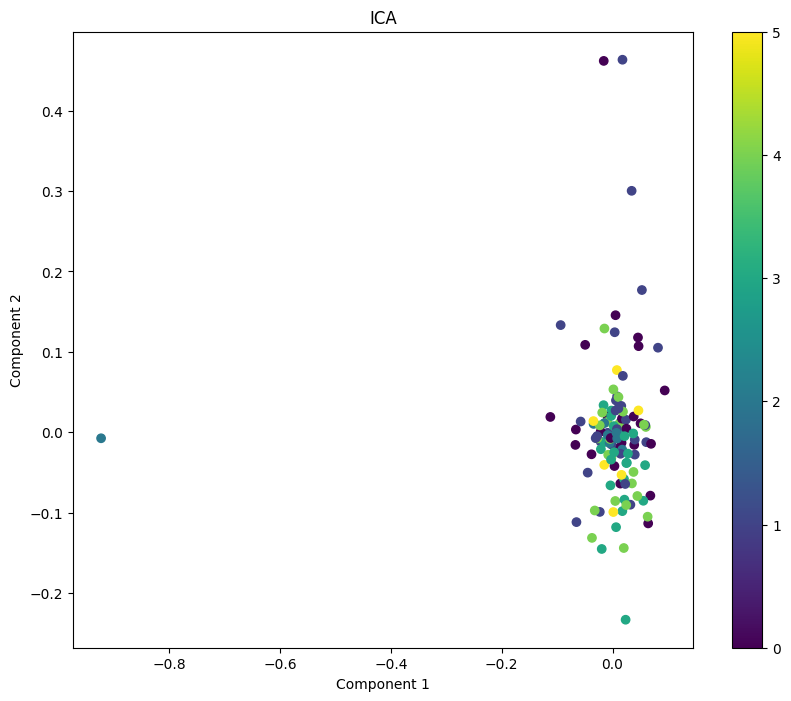

In [22]:
plot_results(X_ica[:, :2], y_train, "ICA")

In [23]:
X_ica_test = ica.transform(X_test_scaled)
ica_accuracy = evaluate_model(X_ica, X_ica_test, y_train, y_test)
print("ICA Accuracy:", ica_accuracy)

ICA Accuracy: 0.5806451612903226


## 3. Isomap
Isomap is a non-linear dimensionality reduction technique that extends MDS (Multi-Dimensional Scaling) by incorporating geodesic distances between data points in the high-dimensional space.

### Procedure:

* Construct a neighborhood graph of data points.
* Compute the shortest paths (geodesic distances) between points in the graph.
* Apply classical MDS on the geodesic distance matrix to reduce dimensions.
### Applications: 
Data visualization, manifold learning.

In [24]:
isomap = Isomap(n_components=50)
X_isomap = isomap.fit_transform(X_train_scaled)
print("Isomap reduced shape:", X_isomap.shape)

Isomap reduced shape: (120, 50)


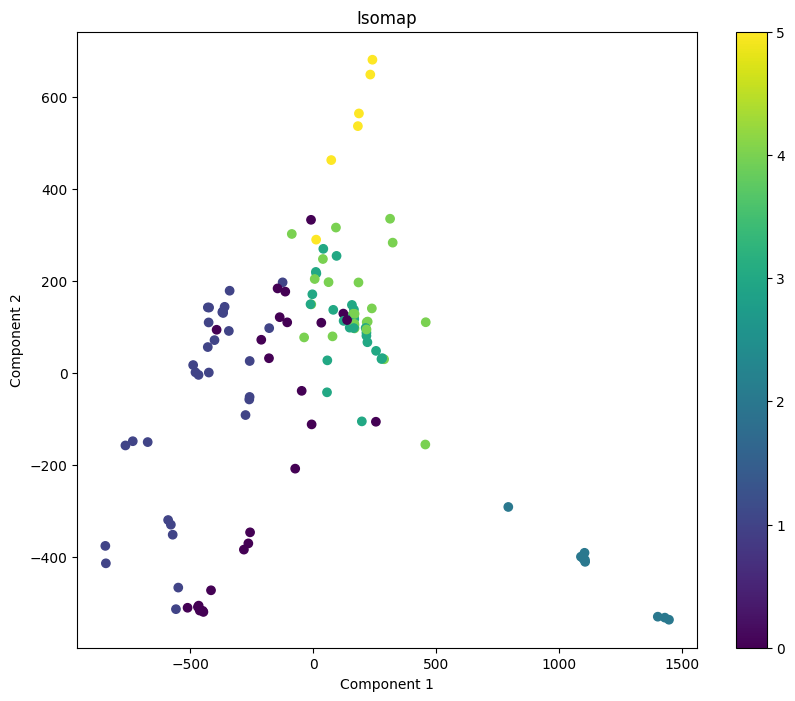

In [25]:
plot_results(X_isomap[:, :2], y_train, "Isomap")

In [26]:
X_isomap_test = isomap.transform(X_test_scaled)
isomap_accuracy = evaluate_model(X_isomap, X_isomap_test, y_train, y_test)
print("Isomap Accuracy:", isomap_accuracy)

Isomap Accuracy: 0.8064516129032258


## 4. Locally Linear Embedding (LLE)
Locally Linear Embedding (LLE) is another non-linear dimensionality reduction technique that focuses on preserving local relationships between data points.

### Procedure:

* For each data point, find its k nearest neighbors.
* Compute weights that best reconstruct each data point from its neighbors.
* Find a lower-dimensional representation that preserves these weights.
### Applications: 
Data visualization, manifold learning.

In [27]:
lle = LocallyLinearEmbedding(n_components=50, random_state=42)
X_lle = lle.fit_transform(X_train_scaled)
print("LLE reduced shape:", X_lle.shape)

LLE reduced shape: (120, 50)


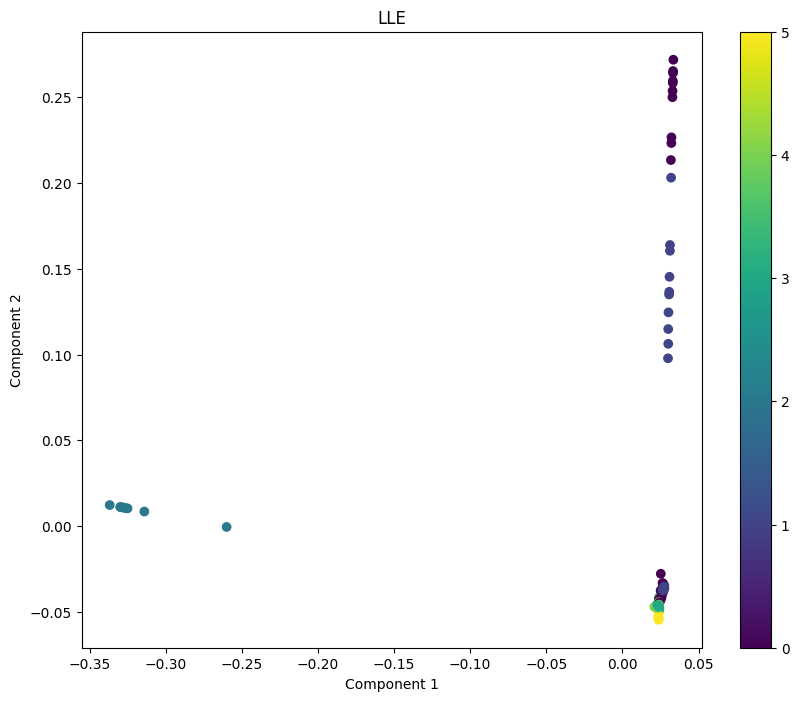

In [28]:
plot_results(X_lle[:, :2], y_train, "LLE")

In [29]:
X_lle_test = lle.transform(X_test_scaled)
lle_accuracy = evaluate_model(X_lle, X_lle_test, y_train, y_test)
print("LLE Accuracy:", lle_accuracy)

LLE Accuracy: 0.7419354838709677


## 5. UMAP (Uniform Manifold Approximation and Projection)
UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that aims to preserve both local and global structures in the data.

### Procedure:

* Construct a fuzzy topological representation of the high-dimensional data.
* Optimize a low-dimensional representation to preserve this topology.
### Applications: 
Data visualization, clustering, dimensionality reduction.

In [30]:
umap_reducer = umap.UMAP(n_components=50, random_state=42)
X_umap = umap_reducer.fit_transform(X_train_scaled)
print("UMAP reduced shape:", X_umap.shape)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP reduced shape: (120, 50)


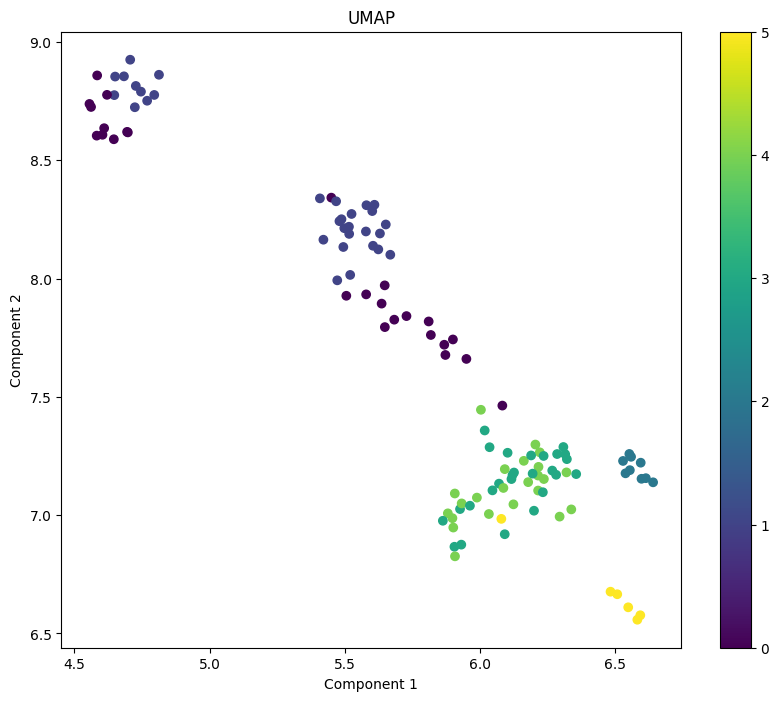

In [31]:
plot_results(X_umap[:, :2], y_train, "UMAP")

In [32]:
X_umap_test = umap_reducer.transform(X_test_scaled)
umap_accuracy = evaluate_model(X_umap, X_umap_test, y_train, y_test)
print("UMAP Accuracy:", umap_accuracy)

UMAP Accuracy: 0.7741935483870968


## 6.  SelectKBest
### Purpose: 
Choose the top k features based on statistical tests.
### Steps:
* Apply univariate statistical tests to rank features.
* Select the top k features.
### Applications: 
Reducing feature space, improving model performance.

In [33]:
selector = SelectKBest(f_classif, k=50)
X_selectk = selector.fit_transform(X_train_scaled, y_train)
print("SelectKBest reduced shape:", X_selectk.shape)

SelectKBest reduced shape: (120, 50)


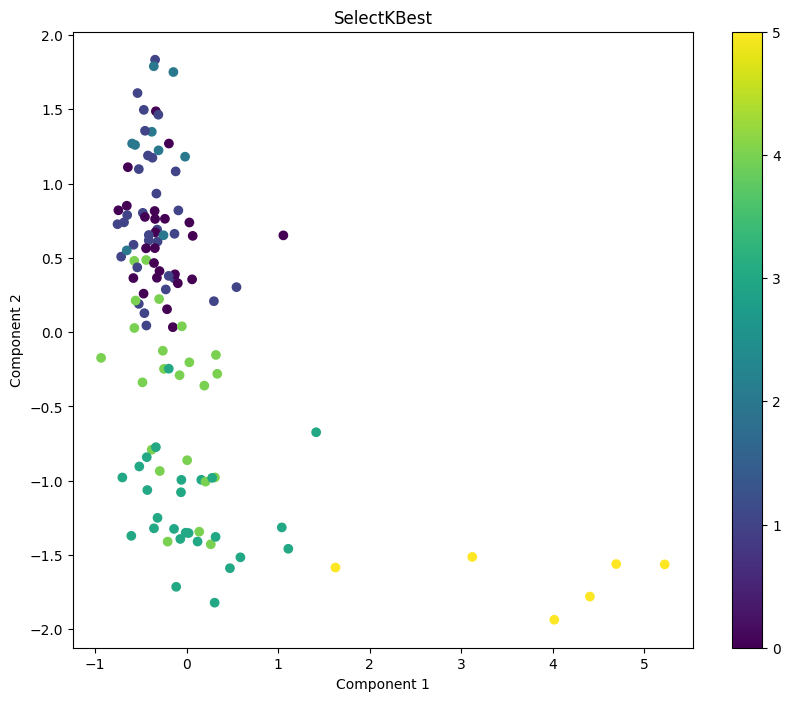

In [34]:
plot_results(X_selectk[:, :2], y_train, "SelectKBest")

In [35]:
X_selectk_test = selector.transform(X_test_scaled)
selectk_accuracy = evaluate_model(X_selectk, X_selectk_test, y_train, y_test)
print("SelectKBest Accuracy:", selectk_accuracy)

SelectKBest Accuracy: 0.9032258064516129


## 7. Recursive Feature Elimination (RFE)
### Purpose: 
Iteratively remove features to find the best subset.
### Steps:
* Train a model and rank features by importance.
* Remove the least important features.
* Re-train and repeat until the desired number of features is reached.
### Applications: 
Feature selection, model optimization.

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=50)
X_rfe = rfe.fit_transform(X_train_scaled, y_train)
print("RFE reduced shape:", X_rfe.shape)

In [ ]:
plot_results(X_rfe[:, :2], y_train, "RFE")

In [ ]:
X_rfe_test = rfe.transform(X_test_scaled)
rfe_accuracy = evaluate_model(X_rfe, X_rfe_test, y_train, y_test)
print("RFE Accuracy:", rfe_accuracy)

## Comparing performance of all techniques


In [37]:
techniques = ['Original', 'PCA', 'LDA', 'ICA', 'Isomap', 'LLE', 'UMAP', 'SelectKBest']
accuracies = [
    evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test),
    pca_accuracy, lda_accuracy, ica_accuracy, isomap_accuracy,
    lle_accuracy, umap_accuracy, selectk_accuracy
]

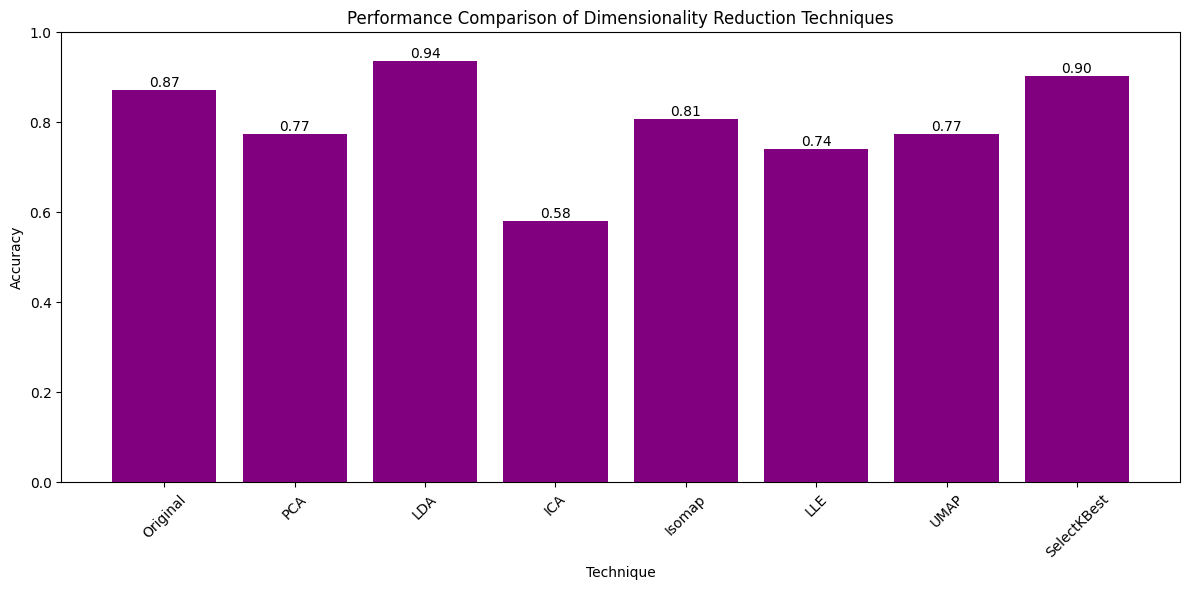

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(techniques, accuracies, color='purple')
plt.title('Performance Comparison of Dimensionality Reduction Techniques')
plt.xlabel('Technique')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()